<h1 align="center">Vizualização de dados</h1>
<br>
<br>

Neste notebook serão apresentados 9 tipos de gráficos para vizualização de dados. Cada um dos gráficos será descrito seu caso de uso ,assim como, sua vizualização utilizando as principais bibliotecas em python. Os gráficos abordados são:

* Gráfico de Barras
* Gráfico de pizza
* Gráfico de donut
* Gráfico de linha
* Gráfico de Área
* Gráfico em cascata
* Gráfico de dispersão
* Histograma
* Diagrama de caixas

In [22]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Exibir gráfico no próprio notebook
%matplotlib inline

In [4]:
#Remover o número de colunas máxima para vizualização do dataset
pd.options.display.max_columns = None

In [5]:
#Ler o Dataset que será usado como exemplo
#Dataset retirado de: https://www.kaggle.com/benroshan/factors-affecting-campus-placement
dataset1 = pd.read_csv("./datasets/Placement_Data_Full_Class.csv")

#Exibir as 5 primeiras observações do dataset
dataset1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<h1 align="center">Gráfico de Barras</h1>

###  Usado para fazer comparações entre categorias de uma variável qualitativa ou quantitativa discreta.

#### No exemplo a seguir será comparada a média dos salários oferecidos de acordo com a especialização:

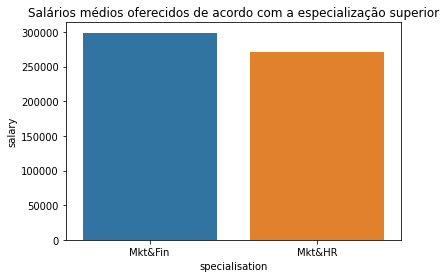

In [31]:
#Obter os dados selecionados do dataset
data = dataset1[["specialisation","salary"]].groupby("specialisation").mean()

#Plotar o gráfico de barras usando o método barplot do seaborn onde:
#x são os possíveis valores do eixo x ou string com o nome da variável
#y são os possíveis valores do eixo y ou string com o nome da variável
#data é o dataset no qual os valores da variáveis passadas estão, caso foram usadas em x ou y
#order são os índices que serão apresentados no gráfico
ax = sns.barplot(x=data.index,y="salary",data=data,order=["Mkt&Fin","Mkt&HR"])

#Inserir o título
ax.set_title("Salários médios oferecidos de acordo com a especialização superior")

#Exibir
plt.show()

<h1 align="center">Gráfico de Pizza</h1>

###  Usado para descrever seções de um todo.

#### No exemplo a seguir será descrito a quantidade de alunos de acordo com o campo de graduação:

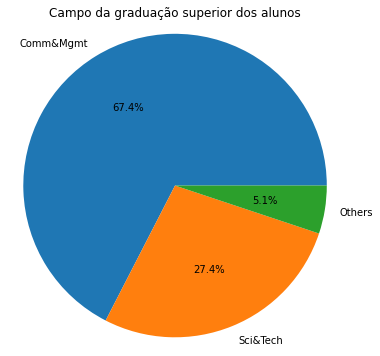

In [21]:
#Obter os dados selecionados do dataset
data = dataset1['degree_t'].value_counts(dropna=False)

#Criar uma figura e um eixo para plotar o gráfico
fig, ax = plt.subplots(figsize=(6,6))

#Gerar o gráfico de pizza usando o método ax.pie(x), onde:
#x são os valores
#labels parâmetro opcional referênte aos nomes das fatias
#atopct parâmetro opcional para apresentar a porcentagem da fatia
ax.pie(data.values, labels=data.index, autopct='%1.1f%%')

#Deixar com aparência de círculo
ax.axis('equal')

#Inserir o título
ax.set_title("Campo da graduação superior dos alunos")

#Exibir
plt.show()

<h1 align="center">Gráfico de Donut</h1>

### Igual ao gráfico pizza só que um buraco no meio que pode ser usado para informar o valor total.
###  Usado para descrever seções de um todo.

#### No exemplo a seguir será descrito a quantidade de alunos que possuem experiência anterior ou não:

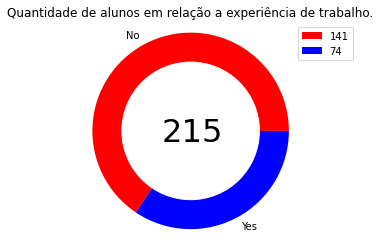

In [20]:
#Obter dados selecionados do dataset
data = dataset1['workex'].value_counts()

#Criar uma figura e um eixo para plotar o gráfico
fig, ax = plt.subplots()

#Gerar o gráfico de pizza usando o método ax.pie(x), onde:
#x são os valores
#labels parâmetro opcional referênte aos nomes das fatias
#colors são as cores que serão utilizadas
ax.pie(data.values, labels=data.index, colors=['red','blue'])

#Inserindo o título
ax.set_title("Quantidade de alunos em relação a experiência de trabalho.")
ax.legend(data.values)
ax.axis("equal")

#Circle(xy(centro do circulo), radius(raio do circulo))
circle=plt.Circle( (0,0), 0.7, color='white')

#Obter a figura atual
p=plt.gcf()

#Obter o eixo atual e adicionar o circulo
p.gca().add_artist(circle)

#Anotação da quantidade total
ax.annotate(data.sum(),(-0.3,-0.1),fontsize=32)

#Exibir
plt.show()

<h1 align="center">Gráfico de Linhas</h1>

###  Usado para descrever o desenvolvimento de variáveis ao longo de um referêncial.

#### No exemplo a seguir foram criados dados, que não representam dados reais, somente para o aprendizado:

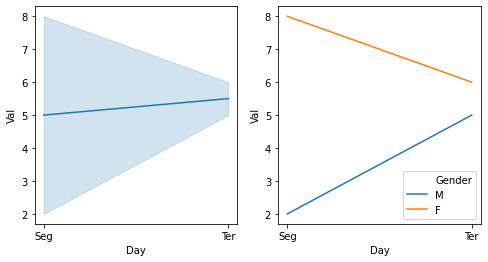

In [16]:
#Gerção dos dados utilizados
data = pd.DataFrame(data={"Day":["Seg","Seg","Ter","Ter"],"Gender":["M","F","F","M"],"Val":[2,8,6,5]})

#Criar uma figura e um eixo para plotar o gráfico
fig, ax = plt.subplots(1,2, figsize=(8,4))

#Gráfico de linhas da biblioteca seaborn sem categorização(gráfico da esquerda), sendo assim apresentando um linha média dos
#valores e a margem de error
sns.lineplot(x="Day",y="Val",data=data,ax=ax[0])

#Gráfico de linhas com categorização, sendo assim mostrando o desenvolvimento de cada uma delas
sns.lineplot(x="Day",y="Val",data=data,hue="Gender",ax=ax[1])

#Exibir
plt.show()

<h1 align="center">Gráfico de Área</h1>

###  Usado para descrever o desenvolvimento de seções de um todo ao longo de um referêncial.

#### No exemplo a seguir foram criados dados, que não representam dados reais, somente para o aprendizado:

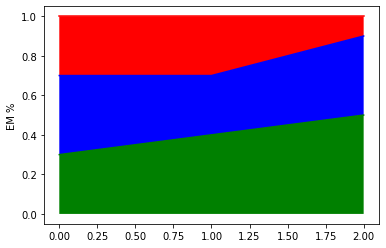

In [29]:
#Geração dos dados
x = np.arange(0, 3)
y1 = np.array([0.3,0.4,0.5])
y2 = np.array([0.7,0.7,0.9])
y3 = np.array([1.0,1.0,1.0])

#Criar uma figura e um eixo para plotar o gráfico
fig, ax = plt.subplots()

#Gráfico de linha do matplotlib, para divisão da áreas
ax.plot(x, y1, color='green')
ax.plot(x, y2, color='blue')
ax.plot(x, y3, color='red')

#Preencher cada regiao usando o métdo fill_between
ax.fill_between(x, 0, y1,facecolor="green")#(regiao preenchida entre 0 e y1)
ax.fill_between(x, y1, y2,facecolor="blue")#(regiao preenchida entre 0 e y1)
ax.fill_between(x, y2, y3,facecolor="red")#(regiao preenchida entre 0 e y1)

#Inserindo rótulo do eixo y
ax.set_ylabel('EM %')

#Exibir
plt.show()

<h1 align="center">Gráfico em cascata</h1>

###  Usado para mostrar passos intermediários entre o perído de desenvolvimento de uma variável

#### No exemplo a seguir foram criados dados, que não representam dados reais, somente para o aprendizado:

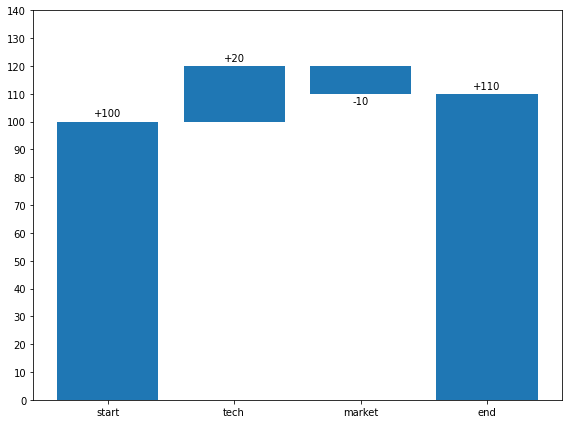

In [30]:
#Geração dos dados
x = ["start","tech","market","end"]
y = [100,20,-10,110]
base= [0,100,120,0]

#Criar uma figura e um eixo para plotar o gráfico
fig,ax = plt.subplots(figsize=(8,6))

#Obter as informações do gráfico gerado
infos_grafico1 = ax.bar(x,y,bottom=base)

#Dimensionar o eixo y 
ax.set_yticks(np.arange(0,150,10))

#Função para inserir os rótulos de cada barra
def autolabel(infos):
    for info in infos:
        val = info.get_height()
        
        height = info.get_y() + val
        
        ax.annotate('+{}'.format(val) if val >= 0 else '{}'.format(val),
                    xy=(info.get_x() + info.get_width() / 2, height),
                    xytext= (0, 3) if val >= 0 else (0,-12),  #verticals offset
                    textcoords="offset points",
                    ha='center', va='bottom')    

autolabel(infos_grafico1)
fig.tight_layout()

plt.show()

<h1 align="center">Gráfico de Dispersão</h1>

###  Usado para vizualizar possíveis insights entre duas variáveis

#### No exemplo foram utilizados o salário de acordo com a graduação superior dos alunos do dataset inicial:

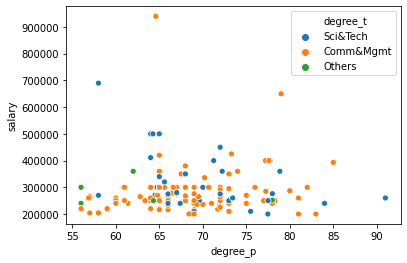

In [32]:
#Criar uma figura e um eixo para plotar o gráfico
fig, ax = plt.subplots()

#Gráfico de dispersão da biblioteca seaborn, onde:
#x são os possíveis valores do eixo x ou string com o nome da variável
#y são os possíveis valores do eixo y ou string com o nome da variável
#data é o dataset no qual os valores da variáveis passadas estão, caso foram usadas em x ou y
#ax é o eixo que será utilizado para plotar o gráfico
sns.scatterplot(x="degree_p",y="salary",data=dataset1,hue="degree_t", ax=ax)

#Exibir
plt.show()

<h1 align="center">Histograma</h1>

###  Usado para vizualizar a frequência de observações de uma variável

#### No exemplo foi utilizado a variável degree_p que informa a porcentagem da gradução de cada aluno do dataset.

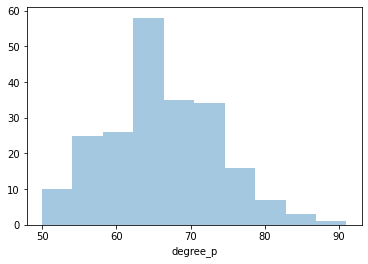

In [8]:
#Criar uma figura e um eixo para plotar o gráfico
fig,ax = plt.subplots()

#Histograma da biblioteca seaborn, onde:
#dataset1["degree_p"] são os valores da variável que será analisado a frequencia
#kde é Estimativa de densidade kernel, caso false: ela não será exibida
#ax é o eixo que será utilizado para plotar o gráfico
#bins é o numero de barras
sns.distplot(dataset1["degree_p"],kde=False,ax=ax,bins=10)

plt.show()

<h1 align="center">Diagrama de caixas</h1>

###  Geralmente usado para vizualizar valores discrepantes nos dados(outliers) mas também informa a mediana e os quartis dos dados.

#### No exemplo foi utilizado a variável degree_p, que informa a porcentagem da gradução de cada aluno, em relação ao campo da graduação.

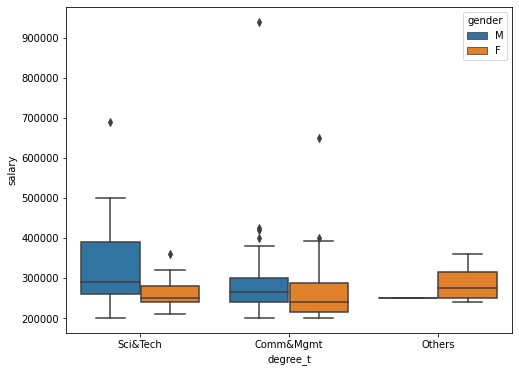

In [11]:
#Criar uma figura e um eixo para plotar o gráfico
fig,ax = plt.subplots(figsize=(8,6))

#Boxplot da biblioteca seaborn, onde:
#x são os possíveis valores do eixo x ou string com o nome da variável
#y são os possíveis valores do eixo y ou string com o nome da variável
#hue é a coloração de acordo com a classificação
#data é o dataset no qual os valores da variáveis passadas estão, caso foram usadas em x ou y
#ax é o eixo que será utilizado para plotar o gráfico
sns.boxplot(x="degree_t",y="salary",hue="gender",data=dataset1,ax=ax)

#Exibir
plt.show()